### Intro to Matplotlib (Line Plots and Scatter Plots)
This is my notebook as an intro to Matplotlib (and juypter notebooks). Be sure to read the chapter [**Python Graphics.**](https://nyudatabootcamp.gitbooks.io/data-bootcamp/content/graphs1.html) 

I'm going to organize this lecture around the question **How does GDP and it's expenditure componenets co-move?** I'll set it up like a mini-project...we will practice previous skills to downlad and manipulate the data, then we will learn about ploting the data (and doing so in a way to explore how GDP and its expenditure componenets move). 

In this notebook, we will learn how to (i) generate the `fig` and `ax` of a figure and then (ii) use the methods associated with thoes objects to manipulate the properties of the figure to make it informative and nice looking. 


In [1]:
import pandas as pd                 # Our pandas package
from pandas_datareader import data  # This is will give us access to FRED
import datetime as dt               # This will get us the datatime package
import matplotlib.pyplot as plt     # The new package we are learning about Matplotlib
                                    # pyplot is just one module of many in this library

%matplotlib inline 
# This line tells jupyter to plot the graphs within the notebook

The data the we will use today is from FRED (the data repository hosted by the Federal Reserve Bank of St. Louis) and I downloaded it using their API (more on this later).

This will contain the basic expenditure components of GDP along with some check that I made of the data. (We will practice droping this stuff). But lets read in the data. I have the excel sheet hosted in my github repository....

In [18]:
data_url = "https://github.com/mwaugh0328/data_bootcamp_spring_2019/raw/master/intro_to_matplotlib/clean/usgdp_data.xlsx"

In [19]:
usdata = pd.read_excel(data_url, index_col = [0])

In [20]:
usdata.head()

,gdp,cons,invs,gov,exp,imp,nx,cons_share,stat_des
DATE,,,,,,,,,
2000-01-01,12924.179,8520.710,2257.109,2645.393,1337.203,1853.884,-516.681,0.659284,0.001366
2000-04-01,13160.842,8603.007,2390.733,2671.254,1375.203,1911.437,-536.234,0.653682,0.002438
2000-07-01,13178.419,8687.485,2367.274,2659.687,1408.783,1978.137,-569.354,0.659221,0.002529
2000-10-01,13260.506,8762.205,2371.809,2675.695,1396.844,1977.750,-580.906,0.660775,0.002391
2001-01-01,13222.690,8797.280,2264.202,2716.773,1376.171,1946.136,-569.965,0.665317,0.001089


In [21]:
usdata.tail()

,gdp,cons,invs,gov,exp,imp,nx,cons_share,stat_des
DATE,,,,,,,,,
2017-10-01,18223.758,12706.369,3246.036,3140.157,2495.874,3395.120,-899.246,0.697242,0.001670
2018-01-01,18323.963,12722.839,3321.028,3152.191,2517.765,3420.127,-902.362,0.694328,0.001652
2018-04-01,18511.576,12842.022,3316.718,3171.810,2574.245,3415.210,-840.965,0.693729,0.001188
2018-07-01,18664.973,12953.291,3436.167,3192.005,2542.227,3491.901,-949.674,0.693989,0.001778
2018-10-01,18784.632,13044.246,3474.724,3195.334,2552.037,3515.249,-963.212,0.694411,0.001786


These codes will give us (quarterly, seasonally adjusted) real gdp, consumption, investment, government expenditures, then net-exports. The final two columns are the share of consumption in GDP and then the statistical descrepancy. Before we do anything more, it is worth checking out the index. **What is it, what is its type?**

In [23]:
usdata.index

DatetimeIndex(['2000-01-01', '2000-04-01', '2000-07-01', '2000-10-01',
               '2001-01-01', '2001-04-01', '2001-07-01', '2001-10-01',
               '2002-01-01', '2002-04-01', '2002-07-01', '2002-10-01',
               '2003-01-01', '2003-04-01', '2003-07-01', '2003-10-01',
               '2004-01-01', '2004-04-01', '2004-07-01', '2004-10-01',
               '2005-01-01', '2005-04-01', '2005-07-01', '2005-10-01',
               '2006-01-01', '2006-04-01', '2006-07-01', '2006-10-01',
               '2007-01-01', '2007-04-01', '2007-07-01', '2007-10-01',
               '2008-01-01', '2008-04-01', '2008-07-01', '2008-10-01',
               '2009-01-01', '2009-04-01', '2009-07-01', '2009-10-01',
               '2010-01-01', '2010-04-01', '2010-07-01', '2010-10-01',
               '2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01',
               '2012-01-01', '2012-04-01', '2012-07-01', '2012-10-01',
               '2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01',
      

This is interesting because the index is a date, but it is stored as this thing called a ["DatatimeIndex"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html). The key thing is that it allows us to grab stuff based on the date...

Here you can use the .loc the location based indexing or just simply use the brackets. 

In [36]:
usdata.loc["2015":]

,gdp,cons,invs,gov,exp,imp,nx,cons_share,stat_des
DATE,,,,,,,,,
2015-01-01,17254.744,11788.364,3096.866,3057.565,2377.687,3072.075,-694.388,0.683196,0.000367
2015-04-01,17397.029,11887.537,3112.431,3087.585,2400.010,3096.722,-696.712,0.683308,0.000356
2015-07-01,17438.802,11971.952,3102.676,3101.775,2379.000,3128.007,-749.007,0.686512,0.000654
2015-10-01,17456.225,12039.650,3056.879,3107.136,2365.675,3125.005,-759.330,0.689705,0.000681
2016-01-01,17523.374,12111.776,3042.889,3133.325,2351.097,3128.983,-777.886,0.691178,0.000757
2016-04-01,17622.486,12214.098,3035.190,3126.731,2370.882,3135.019,-764.137,0.693097,0.000602
2016-07-01,17706.705,12294.303,3032.239,3134.377,2406.373,3172.626,-766.253,0.694330,0.000680
2016-10-01,17784.185,12372.730,3091.661,3135.558,2384.198,3220.858,-836.660,0.695715,0.001175
2017-01-01,17863.023,12427.647,3128.628,3129.576,2413.300,3258.816,-845.516,0.695719,0.001270


Play around with this...

- How do you grab one year
- How to grab multiple years?


No before we practice plotting...we want to compute growth rates...Below is some code that uses the tools we know so far (string manipulation, for loops on itterable objects, our basic pandas skills) to create **new columns** on the data from to plot

In [37]:
var_list = ["gdp", "cons","invs", "gov", "nx"]

for var in var_list:
    new_name = var + "_growth"
    usdata[new_name] = 100*4*usdata[var].pct_change()
    
usdata.head()

,gdp,cons,invs,gov,exp,imp,nx,cons_share,stat_des,gdp_growth,cons_growth,invs_growth,gov_growth,nx_growth
DATE,,,,,,,,,,,,,,
2000-01-01,12924.179,8520.710,2257.109,2645.393,1337.203,1853.884,-516.681,0.659284,0.001366,NaN,NaN,NaN,NaN,NaN
2000-04-01,13160.842,8603.007,2390.733,2671.254,1375.203,1911.437,-536.234,0.653682,0.002438,7.324659,3.863387,23.680558,3.910345,15.137387
2000-07-01,13178.419,8687.485,2367.274,2659.687,1408.783,1978.137,-569.354,0.659221,0.002529,0.534221,3.927836,-3.924989,-1.732070,24.705632
2000-10-01,13260.506,8762.205,2371.809,2675.695,1396.844,1977.750,-580.906,0.660775,0.002391,2.491558,3.440351,0.766282,2.407501,8.115865
2001-01-01,13222.690,8797.280,2264.202,2716.773,1376.171,1946.136,-569.965,0.665317,0.001089,-1.140711,1.601195,-18.147667,6.140909,-7.533749


In [38]:
round(usdata.gdp_growth.mean(),2) # This should be about two percent...

2.01

This last line is another sanity check. I have an idea about what GDP growth is, I want to verify that my computation is consistent with that idea (in this case growth should be about two percent). For example, if the number reteruned was like 123.45, I would quickly know that there is some problem with my code some where **above** this line! 

### Plotting the Data

First, the [**book**](https://nyudatabootcamp.gitbooks.io/data-bootcamp/content/graphs1.html) talks through other approaches to using matplotlib. The approach I walk through below is the third approach and is perfered. The basic idea is that the call above will create two types of objects, a fig object which is like the blank canvas for which a plot call will plot stuff on. The key object however will be the ax or axes part, what this will do is allow us direct axess to the properties of the firgure, title, legange, line colors, etc...

Now below is the basic syntax to generate a plot:

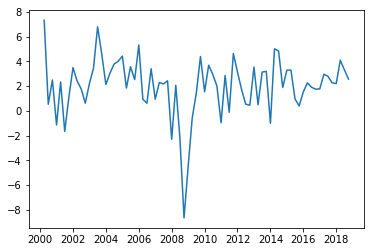

In [39]:
fig, ax = plt.subplots()

ax.plot(usdata.index, usdata.gdp_growth) # So this ploted gdp growth using the axes generated above....

plt.show()

- The first line above is an **important element** of our code plotting style| we first generate a fig (our canvas) and the axes (all the stuff the adorns the canvas, almost like a frame around the canvas). 

- The second line then plots what we want and **pass to it** our axes. What this will alow us to do is when ever we modivy our axes, then the associated figure will change as we specify it. 

- The output from this process is just a simple graph. Some numbers on the y-axis, data on the x-axis (and the only reason it does this is that the dataframe and ploting library recognizes that the index is a date)... It looks ok, but it does not really communicate anything. So now we want to make it look pretty/more professional.

##### Making it look pretty...
A copule of basic elements that we **ALWAYS NEED**: (i) a title (ii) well labeled x and y axis. Note that the well labeld should mean a couple of things, what it is and what units they are in. Now the code below does this using the methods associated with our axes object `ax.` 

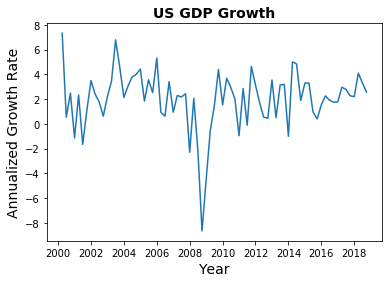

In [40]:
fig, ax = plt.subplots()

ax.plot(usdata.index, usdata.gdp_growth) # So this ploted gdp growth using the axes generated above....

ax.set_title("US GDP Growth", fontsize = 14, fontweight = "bold") # Sets the title. Make it BIG so people understand 
                                                                  # what it is about...
ax.set_ylabel("Annualized Growth Rate", fontsize = 14,)
ax.set_xlabel("Year", fontsize = 14,)

plt.show()

Now this is looking much better. Let me show you a couple of more things.... 
- First, we may want to make the line thicker...again if you are giving a presentation be minduful that when the power point goes up, the lighting may be such that it will be hard to see. 
- Second, having the y-axis be symetric is always nice; so I'm going to reset the y-limits. 
- Third, sometimes you need a legend (in this case not really since the title says it all, but here is a command to do so).

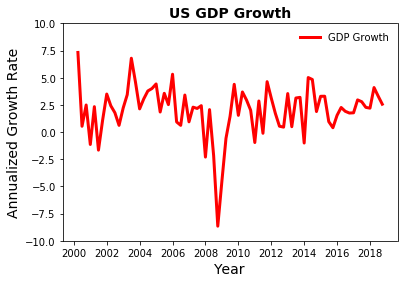

In [41]:
fig, ax = plt.subplots()

ax.plot(usdata.index, usdata.gdp_growth , color = 'r', linewidth = 3.0) 

# HERE I'm changing the color and the thickness of the line...

ax.set_title("US GDP Growth", fontsize = 14, fontweight = "bold") 
ax.set_ylabel("Annualized Growth Rate", fontsize = 14,)
ax.set_xlabel("Year", fontsize = 14,)

ax.set_ylim(-10,10) # This sets the y-limits

ax.legend(["GDP Growth"],frameon=False) 
# Then this sets the legend...note I used the frameon = False option that removes the box around the the legend...

plt.show()

A couple of more options I will show you. 
- One is I'm going to change the x-limit or the data so that we see stuff only from 2005 onward. 
- Second, I'm going to remove the box part of the graph... I think it looks nicer for time series plots...

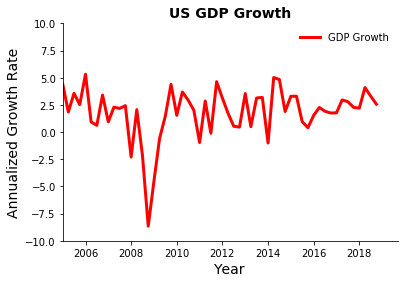

In [42]:
fig, ax = plt.subplots()

ax.plot(usdata.index, usdata.gdp_growth , color = 'r', linewidth = 3.0) 

# HERE I'm changing the color and the thickness of the line...

ax.set_title("US GDP Growth", fontsize = 14, fontweight = "bold") # Sets the title
ax.set_ylabel("Annualized Growth Rate", fontsize = 14,) # The ylable
ax.set_xlabel("Year", fontsize = 14,) # the xlable

ax.set_ylim(-10,10) # This sets the y-limits

ax.legend(["GDP Growth"],frameon=False) # The legend, without a box...

##################################################################################
# This is the new stuff...

ax.set_xlim(dt.datetime(2005,1,1)) # Set the time frame, note that the index is a 
                                   # date time, so to specify where to start 
                                   # I just used the dateime functionality....

ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

plt.savefig("us_gdp_growth.png", bbox_inches = "tight", dip = 1200)

plt.show()

Now that is cool! We now have a **very** clean, nice, and informative graph. Big picture...the key thing about this process is it (i) gives us a lot of direct control and (ii) we won't have todo this over and over again (e.g. if you were trying to make multiple plots in excel. 

----

### Lets practice

Can you create a new code cell and do the followng...

- Can you do the same type of plot but for Net-Exports? What do you see?

- Challangeing: Can you plot a horizontal line indicating the average growth rate of this time period?

----

### Scatter Plots....

Lets return to the substantive question... How does Consumption and GDP co-move over time? While the 2008/2009 recession suggest that when GDP is low, then consumption is low...thus, they co-move (or correlate highly over time). However, its not that obvious, note that there seem to be far more fluctuations in GDP than Consumption. How can we get a better look at the correlation of these two data series. One was is a scatter plot. So lets look at how to build one of those.

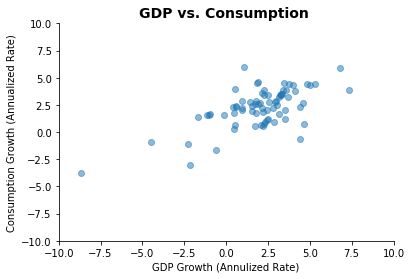

In [43]:
fig, ax = plt.subplots() # Same deal here...

ax.scatter(usdata["gdp_growth"], usdata["cons_growth"],     # x,y variables 
            alpha= 0.50) # Then this last command specifies how dark or light the bubbles are...

##################################################################################
# Again, lets make this informative...

ax.set_title('GDP vs. Consumption ', loc='center', fontsize=14, fontweight = "bold") 
# We know this, but note the new option, it specifies the location....

ax.set_xlabel("GDP Growth (Annulized Rate)")
ax.set_ylabel("Consumption Growth (Annualized Rate)")

ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

ax.set_ylim(-10,10) # Make this a box...why, one can then by eye infer the slope...
ax.set_xlim(-10,10) # 

plt.show()

**Exercises**
* Step 1: Can you simply put some text on the plot. Hint use tab completion on ax and look for `.text`
* Step 2: Can you create a message that on the plot that reports the correlation between GDP and Consumption. Hint: First, you need to compute the correlation between GDP and Consumption.

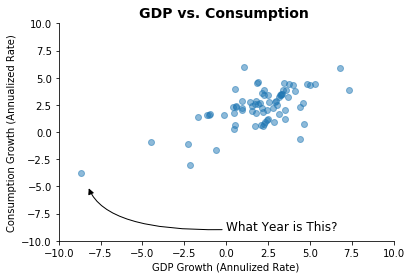

In [44]:
fig, ax = plt.subplots() # Same deal here...

ax.scatter(usdata["gdp_growth"], usdata["cons_growth"],     # x,y variables 
            alpha= 0.50) # Then this last command specifies how dark or light the bubbles are...

##################################################################################
# Again, lets make this informative...

ax.set_title('GDP vs. Consumption ', loc='center', fontsize=14, fontweight = "bold") 
# We know this, but note the new option, it specifies the location....

ax.set_xlabel("GDP Growth (Annulized Rate)")
ax.set_ylabel("Consumption Growth (Annualized Rate)")

ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

ax.set_ylim(-10,10) # Make this a box...why, one can then by eye infer the slope...
ax.set_xlim(-10,10) # 

############################################################################
# This is something new I learned recently

ax.annotate(
    "What Year is This?", 
    xy=(-8.25, -5), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(0, -9), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=5,angleB=110",
        "color": "black"
    },
    fontsize=12,
)

############################################################################

plt.show()

#### GDP AND Consumption

Now lets make two side by side plots of GDP growth and consumption growth so that we can compare them. The process is simmilar, but we can also use for loops to simplify some of the process...

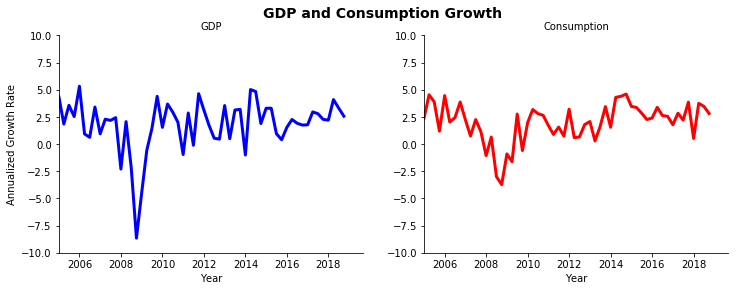

In [45]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,4)) 

# Same deal as before, but here in the subplots we specified how many. This is given by
# the number of rows and columns for which the plots will be...
# the sharex command tells it to share the same x-axis, the figsize is awayt to controll
# how big/small it looksin the jupyter window

# IMPORTANT... now ax is multi-dimensional, so there are two of these, thus when we call 
# ax[0] this specifies use that axes or modify that one....

ax[0].plot(usdata.index, usdata.gdp_growth , color = 'b', linewidth = 3.0) 

ax[1].plot(usdata.index, usdata.cons_growth , color = 'r', linewidth = 3.0) 


# Again, note how I'm saying gdp growth is the first axes and consumption growth is the second axes...

#######################################################################################

# Now liets make it nice looking...add a Title for everything...

fig.suptitle("GDP and Consumption Growth", fontsize = 14, fontweight = "bold")

ax[0].set_title("GDP", fontsize = 10) # This stuff sets the title for each of the subplots...
ax[1].set_title("Consumption", fontsize = 10)

# The command above we needed to do element by element, but lets automate some other things...

for var in ax: # Think through what this is doing, for every instance of ax called var we will
    
    var.set_ylim(-10,10)  # set the ylimits
    
    var.spines["right"].set_visible(False) # remove the top and right spines
    
    var.spines["top"].set_visible(False)
    
    var.set_xlabel("Year") # set the x label to year
    
    var.set_xlim(dt.datetime(2005,1,1)) # set the x limit to 2005, Jan, 1

    
ax[0].set_ylabel("Annualized Growth Rate") # Lable the y axis (only once since its the same for both)


plt.show()

**BOOM!** That was awesome, two nice looking graphs illustrating how GDP growth and Consumption growth have fluctuated over the past 12 years...

---

### Lets practice

- Can you create a new code cell and do the followng...

- Can you do the same type of plot but GDP and Net-Exports? What do you see?

- Challangeing: Can you plot a horizontal line indicating the average growth rate of this time period?

---

That is **AWESOME**. You tell your boss, you stayed up all night to make this look so nice... this took seconds todo...you get promoted AND saved time! 

Quick note, this plot does make clear my hesitation above. They are very related, but not one for one...

### Scaling it up!

This is the point of python: if we were just to do one graph, **maybe**, it still might be quicker in excel... but if we have to do a lot of graphs, this is when the automation of python really kicks in. I want to make the same exact kind of scatter plot, but with Consumption, Investment, Government, and Net-Exports.

Lets... do this! Side note, this actually took me a little bit of time to completely work through, 

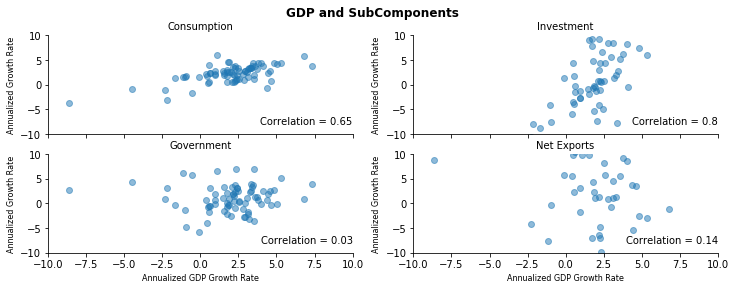

In [46]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True, figsize = (12,4)) 

ax = ax.ravel() # Here is the trick here, ax is a 2 by 2 array. We want to work through it in a loop...so
                # one way to do this is to flatten stuff out, make it a 4 by 1 array. The ravel command 
                # does this...

var_list = ["cons","invs", "gov", "nx"]
nice_name = ["Consumption", "Investment", "Government", "Net Exports"]
new_name = []

# Create some lists... the var_list and new name will allow me to pull the series
# the nice name allows me to report a nice name for the plot...

corr_mat = usdata.corr() # This is the correlation matrix of the data series in the df

for var in var_list:
    new_name.append(var + "_growth") # So this is going through and creating the name structure
                                     # to get the growth rate number...

# Now I'm going to work through each axes, plot the correct data, then set it up to look nice
# the one thing I need is a counter so as I walk through the axes I can get the correct 
# data series that I need....

count = 0

for xxx in ax:
    
    xxx.scatter(usdata["gdp_growth"], usdata[new_name[count]], alpha= 0.50) # Scatter plot
    
    xxx.set_title(nice_name[count], fontsize = 10) # This stuff sets the title for each of the subplots...
    
    xxx.spines["right"].set_visible(False) # remove the top and right spines
    
    xxx.spines["top"].set_visible(False) # Same as above
    
    
    xxx.set_ylabel("Annualized Growth Rate", fontsize = 8) # set the x label to year
    
    if count > 1: # I only one the x label for the bottom ones...
        xxx.set_xlabel("Annualized GDP Growth Rate", fontsize = 8) # set the x label to year
    
    xxx.set_xlim(-10,10) # 
    xxx.set_ylim(-10,10) # This is throwing out a lot of stuff... this is the one issue...
    
    cr = corr_mat.gdp_growth[new_name[count]] # get the correlation matrix
    
    message = "Correlation = " + str(round(cr,2)) # put the stuff together

    xxx.text(10, -8, message, horizontalalignment='right') # print the message in the text box on the figure
      
    count = count + 1 # update counter
    
fig.suptitle("GDP and SubComponents", fontsize = 12, fontweight = "bold") # big titel


plt.show()

Ok, that was impressive, wow! We used a ton of our skills, a little google fu (the `ravel` command was key), and then generated a nice plot reporting the relationship between GDP and its subcomponents.

**What did we learn?** Consumption and investment are highly correlated with GDP. By noting the slope of the relationship, consumption is less volitile, investment is more volitile. Government spending and net exports appear to have very little, systematic relationship with GDP growth.